# Análisis de datos sobre el Titanic

La fuente de datos es un csv sobre el titanic y viene desde la [url](https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv)

## Librerías

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns

## Carga de datos

In [2]:
titanic = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = titanic.copy()

## Diccionario de variables (features o columnas)

|Feature|Descripción |tipo de dato |clasificación de dato |tratamiento |
|---|--- |---- |--- |--- |
|``PassengerId``|  identificador único del pasajero. |int |indice |nada |
|``Survived``| si el pasajero sobrevivió al naufragio, codificada como 0 (no) y 1 (si). |int |binario | |
|``Pclass``| clase a la que pertenecía el pasajero: 1, 2 o 3. |int |cualitativo ordinal | |
|``Name``| nombre del pasajero |string |cualitativo nominal | |
|``Sex``| sexo del pasajero. |string |binario | |
|``Age``| edad del pasajero. |float |cuantitativo discreto |transformar a int |
|``SibSp``|número de hermanos, hermanas, hermanastros o hermanastras en el barco. |int |cuantitativo discreto | |
|``Parch``|número de padres e hijos en el barco.|int |cuantitativo discreto | |
|``Ticket``|  identificador del billete. |string |--- | |
|``Fare``| precio pagado por el billete. |float |cuantitativo continuo | |
|``Cabin``| identificador del camarote asignado al pasajero. |string |--- |eliminarla |
|``Embarked``| puerto en el que embarcó el pasajero. |string |cualitativo nominal | |

## Análisis Técnico

In [4]:
df.shape

(891, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
(df.isnull().sum() / len(df)) *100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
for col in df:
    print(f"El porcentaje de unicos en la variable {col} son {round((len(df[col].unique())/len(df))*100,2)}, {len(df[col].unique())}")

El porcentaje de unicos en la variable PassengerId son 100.0, 891
El porcentaje de unicos en la variable Survived son 0.22, 2
El porcentaje de unicos en la variable Pclass son 0.34, 3
El porcentaje de unicos en la variable Name son 100.0, 891
El porcentaje de unicos en la variable Sex son 0.22, 2
El porcentaje de unicos en la variable Age son 9.99, 89
El porcentaje de unicos en la variable SibSp son 0.79, 7
El porcentaje de unicos en la variable Parch son 0.79, 7
El porcentaje de unicos en la variable Ticket son 76.43, 681
El porcentaje de unicos en la variable Fare son 27.83, 248
El porcentaje de unicos en la variable Cabin son 16.61, 148
El porcentaje de unicos en la variable Embarked son 0.45, 4


In [8]:
for col in ['Survived','Pclass','Sex','Embarked']:
    print(df[col].value_counts(normalize=True,dropna=False))
    print("-------------")

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64
-------------
Pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64
-------------
Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64
-------------
Embarked
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: proportion, dtype: float64
-------------


In [9]:
df['Age'] = df['Age'].apply(lambda row: 1 if row<1 else row)

In [10]:
# df['Age'] = np.where(df['Age']<50,100,df['Age'])

In [11]:
# df.loc[df['Age'] < 1 ,'Age'] = 1

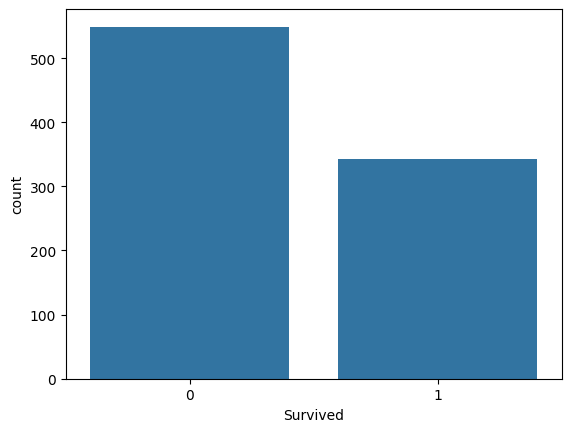

In [24]:
sns.countplot(data=df,x='Survived');

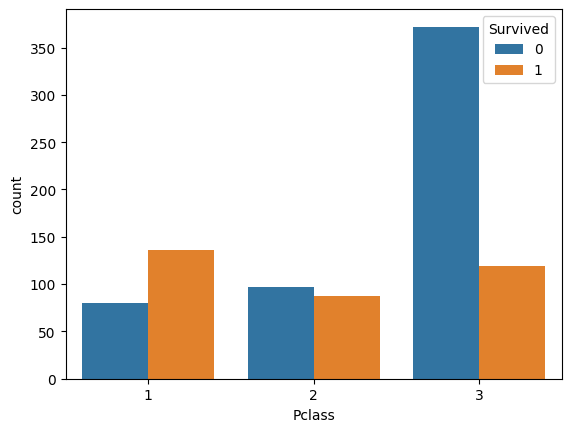

In [23]:
sns.countplot(data=df,x='Pclass', hue='Survived');

In [30]:
edad = pd.cut(df['Age'], [0,13,18,25,90], labels=['niños','adolescentes','adultos','senior'])

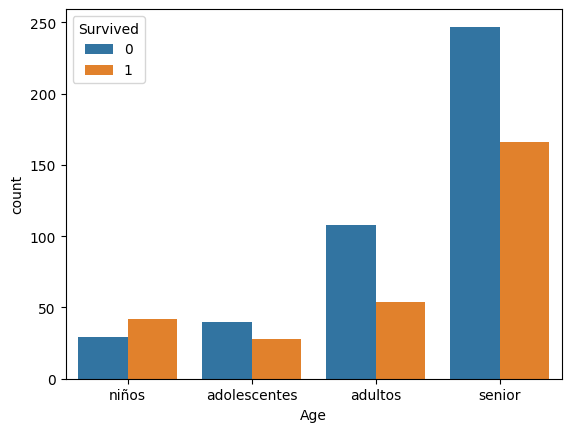

In [32]:
sns.countplot(data = df ,x = edad, hue='Survived');

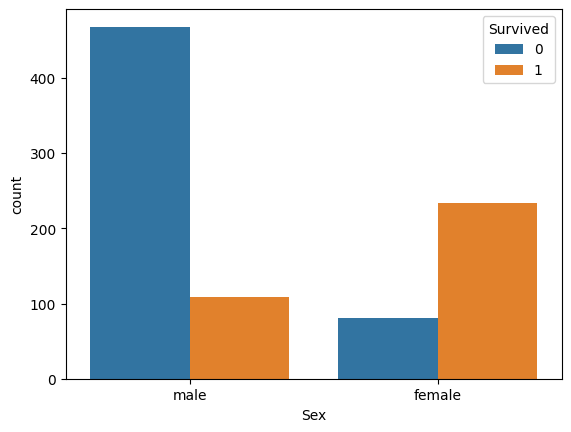

In [33]:
sns.countplot(data = df ,x = 'Sex', hue='Survived');